In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = "/content/drive/MyDrive/9th semester/SP/kidney_disease.csv"
df = pd.read_csv(url)
df.set_index('id', inplace=True)
df.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd


In [ ]:
col = df.columns

In [ ]:
rows = df.shape[0]
rows

400

In [ ]:
col_num = ["age", "bp", "sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wc", "rc"]
col_category = ["rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane", "classification"]


In [ ]:
Null_value_num= df[col_num].isnull().sum()
Null_value_category = df[col_category].isnull().sum()

display(Null_value_num)
display(Null_value_category)

age       9
bp       12
sg       47
al       46
su       49
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      70
wc      105
rc      130
dtype: int64

rbc               152
pc                 65
pcc                 4
ba                  4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
df['dm'] = df['dm'].replace(to_replace={'\tno':'no', '\tyes':'yes', ' yes':'yes'})
df['cad'] = df['cad'].replace(to_replace='\tno', value='no')
df['classification'] = df['classification'].replace(to_replace='ckd\t', value='ckd')
df['pcv'] = df['pcv'].replace(to_replace={'\t?':np.nan, '\t43':43})
df['wc'] = df['wc'].replace(to_replace={'\t?':np.nan, '\t6200':6200, '\t8400':8400})
df['rc'] = df['rc'].replace(to_replace={'\t?':np.nan, '\t3.9':3.9, '\t4.0':4.0, '\t5.2':5.2})

In [ ]:
for i in col_category:
    print(i)
    print(df[i].unique())

for i in col_num:
    print(i)
    print(df[i].unique())

rbc
[1 0]
pc
[1 0]
pcc
[0 1]
ba
[0 1]
htn
[1 0]
dm
[1 0]
cad
[0 1]
appet
[0 1]
pe
[0 1]
ane
[0 1]
classification
[1 0]
age
[48.0 7.0 62.0 51.0 60.0 68.0 24.0 52.0 53.0 50.0 63.0 40.0 47.0 61.0 21.0
 42.0 75.0 69.0 73.0 70.0 65.0 76.0 72.0 82.0 46.0 45.0 35.0 54.0 11.0
 59.0 67.0 15.0 55.0 44.0 26.0 64.0 56.0 5.0 74.0 38.0 58.0 71.0 34.0 17.0
 12.0 43.0 41.0 57.0 8.0 39.0 66.0 81.0 14.0 27.0 83.0 30.0 4.0 3.0 6.0
 32.0 80.0 49.0 90.0 78.0 19.0 2.0 33.0 36.0 37.0 23.0 25.0 20.0 29.0 28.0
 22.0 79.0]
bp
[80.0 50.0 70.0 90.0 100.0 60.0 110.0 140.0 180.0 120.0]
sg
[1.02 1.01 1.005 1.015 1.025]
al
[1.0 4.0 2.0 3.0 0.0 5.0]
su
[0.0 3.0 4.0 1.0 2.0 5.0]
bgr
[121.0 99.0 423.0 117.0 106.0 74.0 100.0 410.0 138.0 70.0 490.0 380.0
 208.0 98.0 157.0 76.0 114.0 263.0 173.0 95.0 108.0 156.0 264.0 123.0 93.0
 107.0 159.0 140.0 171.0 270.0 92.0 137.0 204.0 79.0 207.0 124.0 144.0
 91.0 162.0 246.0 253.0 141.0 182.0 86.0 150.0 146.0 425.0 112.0 250.0
 360.0 163.0 129.0 133.0 102.0 158.0 165.0 132.0 104.0 

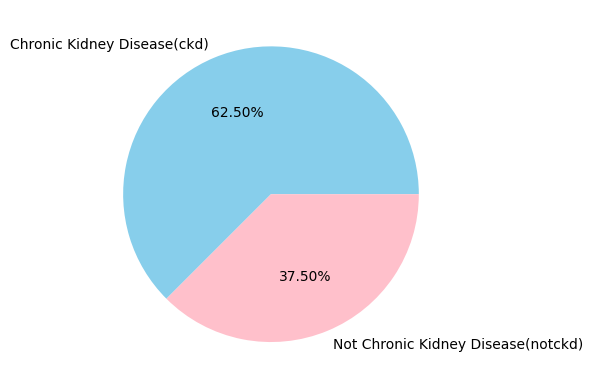

In [ ]:
label = ["Chronic Kidney Disease(ckd)","Not Chronic Kidney Disease(notckd)"]
col=['skyblue','pink']
value = df['classification'].value_counts().values.tolist()
plt.pie(value,labels=label,autopct='%1.2f%%',colors=col)
plt.show()

In [ ]:
df['classification'] = df['classification'].replace(to_replace={'ckd':1, 'notckd':0})

In [ ]:
nan_value = df[col_category].isnull().sum()
nan_value

rbc               152
pc                 65
pcc                 4
ba                  4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer as smp
simpleImputer = smp(missing_values = np.nan, strategy = 'most_frequent')
df[col_category] = simpleImputer.fit_transform(df[col_category])
df[col_category]

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,1
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,1
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,1
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,1
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,0
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,0
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,0


In [ ]:
nan_value = df[col_category].isnull().sum()
nan_value

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [ ]:
nan_value = df[col_num].isnull().sum()
nan_value

age       9
bp       12
sg       47
al       46
su       49
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      71
wc      106
rc      131
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer as smp
simpleImputer = smp(missing_values = np.nan, strategy = 'most_frequent')
df[col_num] = simpleImputer.fit_transform(df[col_num])
df[col_num]

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
id,,,,,,,,,,,,,,
0,48.0,80.0,1.02,1.0,0.0,121.0,36.0,1.2,135.0,3.5,15.4,44,7800,5.2
1,7.0,50.0,1.02,4.0,0.0,99.0,18.0,0.8,135.0,3.5,11.3,38,6000,5.2
2,62.0,80.0,1.01,2.0,3.0,423.0,53.0,1.8,135.0,3.5,9.6,31,7500,5.2
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9
4,51.0,80.0,1.01,2.0,0.0,106.0,26.0,1.4,135.0,3.5,11.6,35,7300,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.02,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2
397,12.0,80.0,1.02,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4


In [ ]:
nan_value = df[col_num].isnull().sum()
nan_value

age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64

In [ ]:
rows=df.shape[0]
rows

400

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df[col_category] = df[col_category].apply(encoder.fit_transform)
df[col_category].head(3)

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,
0,1,1,0,0,1,1,0,0,0,0,1
1,1,1,0,0,0,0,0,0,0,0,1
2,1,1,0,0,0,1,0,1,0,1,1


In [ ]:
print(df[col_category].isnull().sum())
print(df[col_num].isnull().sum())

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64
age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
X = df.drop(columns=['classification'])
Y = df['classification']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
x_train.head(3)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
id,,,,,,,,,,,,,,,,,,,,,
290,54.0,70.0,1.02,0.0,0.0,1,1,0,0,76.0,...,14.8,52,8400,5.9,0,0,0,0,0,0
221,66.0,70.0,1.02,1.0,0.0,1,1,0,0,248.0,...,15.0,41,9800,5.2,1,1,0,0,0,0
344,64.0,60.0,1.02,0.0,0.0,1,1,0,0,106.0,...,14.4,42,8100,4.7,0,0,0,0,0,0


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_train_predict=log.predict(x_train)
train_accuracy= accuracy_score(y_train_predict,y_train)*100
train_accuracy


89.375

In [ ]:
y_test_predict=log.predict(x_test)
test_accuracy= accuracy_score(y_test_predict,y_test)*100
sc1=test_accuracy
sc1

91.25

In [ ]:
print(classification_report(y_test_predict,y_test))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        32
           1       1.00      0.85      0.92        48

    accuracy                           0.91        80
   macro avg       0.91      0.93      0.91        80
weighted avg       0.93      0.91      0.91        80



**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tr=DecisionTreeClassifier()
tr.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
tr_y_train_predict=tr.predict(x_train)
tr_train_accuracy= accuracy_score(tr_y_train_predict,y_train)*100
tr_train_accuracy

100.0

In [ ]:
tr_y_test_predict=tr.predict(x_test)
tr_test_accuracy= accuracy_score(tr_y_test_predict,y_test)*100
sc2=tr_test_accuracy
sc2

97.5

In [ ]:
print(classification_report(tr_y_test_predict,y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.95      0.98        43

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



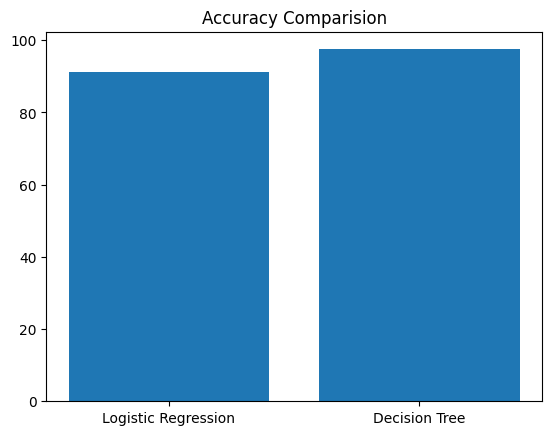

In [ ]:
x=['Logistic Regression','Decision Tree']
y=[sc1,sc2]
plt.title('Accuracy Comparision')
plt.bar(x, y)
plt.show()